In [326]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  
import seaborn as sns  
import warnings
import scipy.stats as stats 




#### Data overview 

In [331]:
# Load the dataset
df = pd.read_csv("Bank_Transaction_Fraud_Detection.csv")

# Display first few rows
df.head()

,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
0,CUST000001,Customer_1,Male,25,CA,Los Angeles,Branch B,Checking,TXN000000001,2023-01-01 00:00:00,...,Clothing,1760.420524,POS Terminal,CA,Windows PC,0,USD,+1-240-2997,Gift,customer2148@bank.com
1,CUST000002,Customer_2,Female,58,FL,New York,Branch C,Savings,TXN000000002,2023-01-01 00:01:00,...,Luxury,7833.088780,Web,TX,Android,0,USD,+1-641-1940,Payment,customer8393@bank.com
2,CUST000003,Customer_3,Female,71,PA,Dallas,Branch A,Savings,TXN000000003,2023-01-01 00:02:00,...,Travel,7239.890561,POS Terminal,IL,Windows PC,0,EUR,+1-685-4317,Subscription,customer8594@bank.com
3,CUST000004,Customer_4,Female,27,NY,Chicago,Branch A,Savings,TXN000000004,2023-01-01 00:03:00,...,Clothing,4269.744125,POS Terminal,CA,Windows PC,0,CAD,+1-650-5207,Subscription,customer1396@bank.com
4,CUST000005,Customer_5,Male,28,OH,Philadelphia,Branch B,Savings,TXN000000005,2023-01-01 00:04:00,...,Electronics,4877.511195,Web,PA,Linux,0,CAD,+1-995-5816,Gift,customer1126@bank.com


In [333]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Customer_ID              200000 non-null  object 
 1   Customer_Name            200000 non-null  object 
 2   Gender                   200000 non-null  object 
 3   Age                      200000 non-null  int64  
 4   State                    200000 non-null  object 
 5   City                     200000 non-null  object 
 6   Bank_Branch              200000 non-null  object 
 7   Account_Type             200000 non-null  object 
 8   Transaction_ID           200000 non-null  object 
 9   Transaction_Date         200000 non-null  object 
 10  Transaction_Time         200000 non-null  object 
 11  Transaction_Amount       200000 non-null  float64
 12  Merchant_ID              200000 non-null  object 
 13  Transaction_Type         200000 non-null  object 
 14  Merc

In [335]:
df.isnull().sum()


Customer_ID                0
Customer_Name              0
Gender                     0
Age                        0
State                      0
City                       0
Bank_Branch                0
Account_Type               0
Transaction_ID             0
Transaction_Date           0
Transaction_Time           0
Transaction_Amount         0
Merchant_ID                0
Transaction_Type           0
Merchant_Category          0
Account_Balance            0
Transaction_Device         0
Transaction_Location       0
Device_Type                0
Is_Fraud                   0
Transaction_Currency       0
Customer_Contact           0
Transaction_Description    0
Customer_Email             0
dtype: int64

In [337]:
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])
df['Transaction_Year'] = df['Transaction_Date'].dt.year
df['Transaction_Month'] = df['Transaction_Date'].dt.month
df['Transaction_Day'] = df['Transaction_Date'].dt.day
df['Transaction_Weekday'] = df['Transaction_Date'].dt.weekday  

In [339]:
df['Transaction_Time'] = pd.to_datetime(df['Transaction_Time'])


def categorize_time(time):
    hour = time.hour
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['Time_Category'] = df['Transaction_Time'].apply(categorize_time)

C:\Windows\Temp\ipykernel_28760\3243298511.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Transaction_Time'] = pd.to_datetime(df['Transaction_Time'])


In [340]:
df.head()

,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email,Transaction_Year,Transaction_Month,Transaction_Day,Transaction_Weekday,Time_Category
0,CUST000001,Customer_1,Male,25,CA,Los Angeles,Branch B,Checking,TXN000000001,2023-01-01 00:00:00,...,0,USD,+1-240-2997,Gift,customer2148@bank.com,2023,1,1,6,Night
1,CUST000002,Customer_2,Female,58,FL,New York,Branch C,Savings,TXN000000002,2023-01-01 00:01:00,...,0,USD,+1-641-1940,Payment,customer8393@bank.com,2023,1,1,6,Night
2,CUST000003,Customer_3,Female,71,PA,Dallas,Branch A,Savings,TXN000000003,2023-01-01 00:02:00,...,0,EUR,+1-685-4317,Subscription,customer8594@bank.com,2023,1,1,6,Night
3,CUST000004,Customer_4,Female,27,NY,Chicago,Branch A,Savings,TXN000000004,2023-01-01 00:03:00,...,0,CAD,+1-650-5207,Subscription,customer1396@bank.com,2023,1,1,6,Night
4,CUST000005,Customer_5,Male,28,OH,Philadelphia,Branch B,Savings,TXN000000005,2023-01-01 00:04:00,...,0,CAD,+1-995-5816,Gift,customer1126@bank.com,2023,1,1,6,Night


#### Drop column

In [344]:
df = df.drop_duplicates()


In [346]:
# Assuming df is your DataFrame
unique_counts = df[['Transaction_Year', 'Transaction_Month', 'Transaction_Day', 'Transaction_Weekday']].nunique()

print(unique_counts)


Transaction_Year        1
Transaction_Month       5
Transaction_Day        31
Transaction_Weekday     7
dtype: int64


In [348]:
df_new = df.drop(columns=['Customer_ID', 'Customer_Name', 
                          'Transaction_ID', 'Merchant_ID',
                          'Transaction_Date','Transaction_Time','Transaction_Year',
                          'Customer_Contact', 'Customer_Email'])

df_new.head()

,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_Amount,Transaction_Type,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Transaction_Description,Transaction_Month,Transaction_Day,Transaction_Weekday,Time_Category
0,Male,25,CA,Los Angeles,Branch B,Checking,102.690676,Online,Clothing,1760.420524,POS Terminal,CA,Windows PC,0,USD,Gift,1,1,6,Night
1,Female,58,FL,New York,Branch C,Savings,83.034624,ATM Withdrawal,Luxury,7833.088780,Web,TX,Android,0,USD,Payment,1,1,6,Night
2,Female,71,PA,Dallas,Branch A,Savings,51.521278,ATM Withdrawal,Travel,7239.890561,POS Terminal,IL,Windows PC,0,EUR,Subscription,1,1,6,Night
3,Female,27,NY,Chicago,Branch A,Savings,74.897156,ATM Withdrawal,Clothing,4269.744125,POS Terminal,CA,Windows PC,0,CAD,Subscription,1,1,6,Night
4,Male,28,OH,Philadelphia,Branch B,Savings,5.000000,Online,Electronics,4877.511195,Web,PA,Linux,0,CAD,Gift,1,1,6,Night


In [350]:
df_new.to_csv('new_dataset.csv', index=False) 


In [352]:
print(df_new['Is_Fraud'].value_counts(normalize=True))

Is_Fraud
0    0.93
1    0.07
Name: proportion, dtype: float64


In [354]:
import os
print("path：", os.getcwd())


path： C:\Users\Administrator\INSY 695 Enterprise AI


In [356]:
df_new = pd.read_csv("new_dataset.csv")

#### Create a Test Set

In [359]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df_new, test_size=0.2, stratify=df_new['Is_Fraud'], random_state=42)


print("Train Set Class Distribution:\n", train_set['Is_Fraud'].value_counts(normalize=True))
print("Test Set Class Distribution:\n", test_set['Is_Fraud'].value_counts(normalize=True))


Train Set Class Distribution:
 Is_Fraud
0    0.93
1    0.07
Name: proportion, dtype: float64
Test Set Class Distribution:
 Is_Fraud
0    0.93
1    0.07
Name: proportion, dtype: float64


#### Categorical into Numerical 

In [362]:

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import KFold


categorical_cols = train_set.select_dtypes(include=['object']).columns.tolist()

 
dummy_encode_cols = []  
label_encode_cols = []  
freq_encode_cols = []  
target_encode_cols = []

for col in categorical_cols:
    num_unique = train_set[col].nunique()

    if num_unique < 5:
        dummy_encode_cols.append(col)  # One-Hot Encoding
    elif num_unique <= 20:
        label_encode_cols.append(col)  # Label Encoding
    elif num_unique <= 50:
        freq_encode_cols.append(col)  # Frequency Encoding
    else:
        target_encode_cols.append(col)  # Target Encoding

print("Dummy Encoding:", dummy_encode_cols)
print("Label Encoding:", label_encode_cols)
print("Frequency Encoding:", freq_encode_cols)
print("Target Encoding:", target_encode_cols)



Dummy Encoding: ['Gender', 'Bank_Branch', 'Account_Type', 'Transaction_Type', 'Transaction_Device', 'Transaction_Currency', 'Time_Category']
Label Encoding: ['State', 'City', 'Merchant_Category', 'Transaction_Location', 'Device_Type', 'Transaction_Description']
Frequency Encoding: []
Target Encoding: []


In [364]:
# 1. Dummy Encoding
train_set = pd.get_dummies(train_set, columns=dummy_encode_cols, drop_first=True)
test_set = pd.get_dummies(test_set, columns=dummy_encode_cols, drop_first=True)


train_set, test_set = train_set.align(test_set, join='left', axis=1)
test_set.fillna(0, inplace=True)

# 2. Label Encoding
label_encoders = {}
for col in label_encode_cols:
    le = LabelEncoder()
    train_set[col] = le.fit_transform(train_set[col])  
    test_set[col] = test_set[col].map(lambda x: le.transform([x])[0] if x in le.classes_ else -1)  
    label_encoders[col] = le  

# 3. Frequency Encoding
for col in freq_encode_cols:
    freq_map = train_set[col].value_counts(normalize=True).to_dict()
    train_set[col] = train_set[col].map(freq_map)
    test_set[col] = test_set[col].map(freq_map).fillna(train_set[col].mean())

# 4. K-Fold Target Encoding
train_set = train_set.reset_index(drop=True)
test_set = test_set.reset_index(drop=True)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
for col in target_encode_cols:
    train_set[col + '_target_enc'] = 0 
    for train_idx, val_idx in kf.split(train_set):
        train_fold = train_set.iloc[train_idx].copy()
        val_fold = train_set.iloc[val_idx].copy()

        mean_target = train_fold.groupby(col)['Is_Fraud'].mean()
        train_set.loc[train_set.index[val_idx], col + '_target_enc'] = train_set.loc[train_set.index[val_idx], col].map(mean_target).fillna(train_set['Is_Fraud'].mean())

    test_set[col + '_target_enc'] = test_set[col].map(train_set.groupby(col)['Is_Fraud'].mean()).fillna(train_set['Is_Fraud'].mean())

train_set.drop(columns=target_encode_cols, inplace=True)
test_set.drop(columns=target_encode_cols, inplace=True)


train_set, test_set = train_set.align(test_set, join='left', axis=1)
test_set.fillna(train_set.mean(), inplace=True)

print(f'Processed train set shape: {train_set.shape}')
print(f'Processed test set shape: {test_set.shape}')

Processed train set shape: (160000, 30)
Processed test set shape: (40000, 30)


In [365]:
# Check for remaining categorical columns
remaining_categorical_cols = train_set.select_dtypes(include=['object']).columns.tolist()
print("Remaining categorical columns:", remaining_categorical_cols)


Remaining categorical columns: []


In [368]:
print(train_set.dtypes)
print(train_set.head())  # To visually inspect the transformed data


Age                                  int64
State                                int32
City                                 int32
Transaction_Amount                 float64
Merchant_Category                    int32
Account_Balance                    float64
Transaction_Location                 int32
Device_Type                          int32
Is_Fraud                             int64
Transaction_Description              int32
Transaction_Month                    int64
Transaction_Day                      int64
Transaction_Weekday                  int64
Gender_Male                           bool
Bank_Branch_Branch B                  bool
Bank_Branch_Branch C                  bool
Bank_Branch_Branch D                  bool
Account_Type_Checking                 bool
Account_Type_Savings                  bool
Transaction_Type_Online               bool
Transaction_Type_POS                  bool
Transaction_Device_Mobile             bool
Transaction_Device_POS Terminal       bool
Transaction

In [370]:
print("Dummy encoded columns example:")
print([col for col in train_set.columns if any(col.startswith(prefix) for prefix in dummy_encode_cols)])


Dummy encoded columns example:
['Gender_Male', 'Bank_Branch_Branch B', 'Bank_Branch_Branch C', 'Bank_Branch_Branch D', 'Account_Type_Checking', 'Account_Type_Savings', 'Transaction_Type_Online', 'Transaction_Type_POS', 'Transaction_Device_Mobile', 'Transaction_Device_POS Terminal', 'Transaction_Device_Web', 'Transaction_Currency_EUR', 'Transaction_Currency_GBP', 'Transaction_Currency_USD', 'Time_Category_Evening', 'Time_Category_Morning', 'Time_Category_Night']


In [372]:
print("Unique values in label-encoded columns:")
for col in label_encode_cols:
    print(f"{col}: {train_set[col].unique()}")


Unique values in label-encoded columns:
State: [6 2 0 5 1 3 4]
City: [3 1 5 4 6 2 0]
Merchant_Category: [4 5 0 3 1 2]
Transaction_Location: [5 3 6 1 7 0 9 8 4 2]
Device_Type: [2 0 1 4 5 3]
Transaction_Description: [4 3 2 0 1]


#### Feature Importance

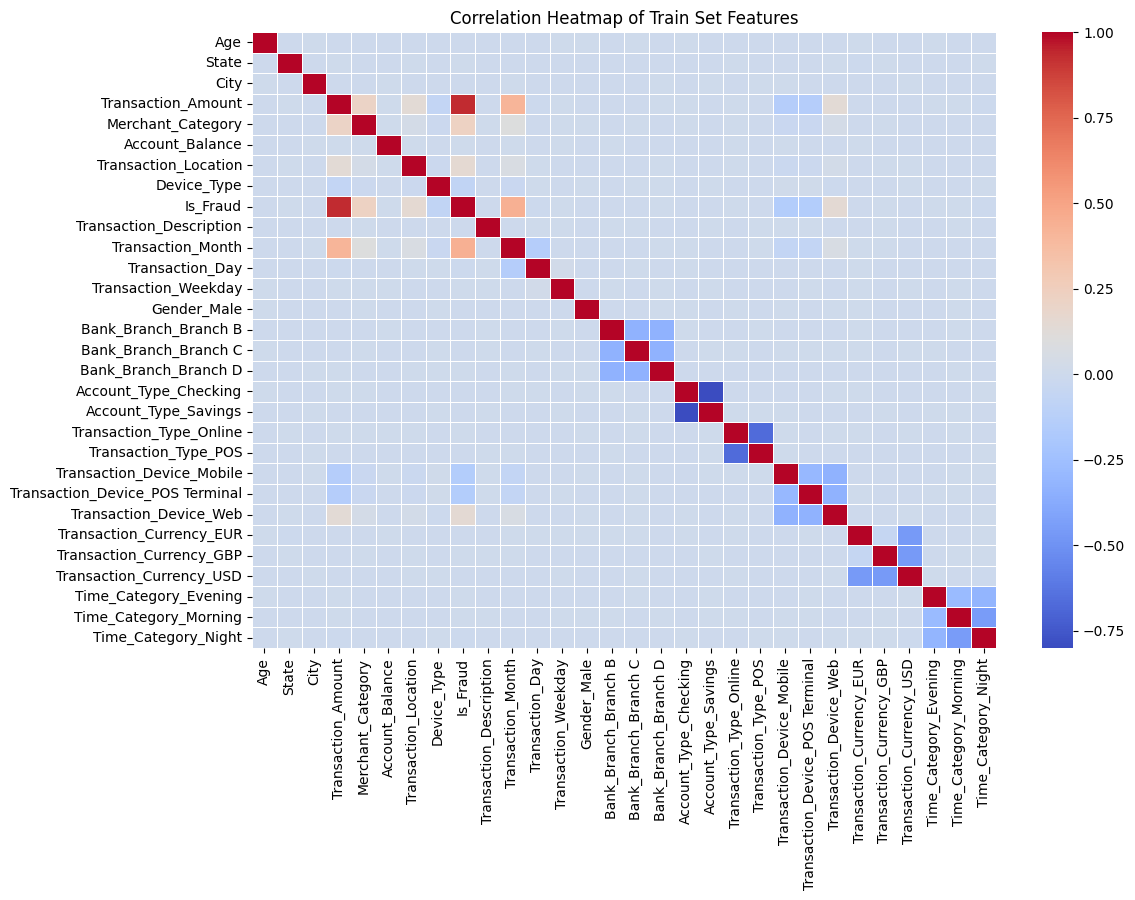

In [375]:
#import seaborn as sns
#import matplotlib.pyplot as plt


correlation_matrix = train_set.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Train Set Features")
plt.show()


In [377]:
fraud_correlation = train_set.corr()['Is_Fraud'].sort_values(ascending=False)
print(fraud_correlation)


Is_Fraud                           1.000000
Transaction_Amount                 0.936302
Transaction_Month                  0.438388
Merchant_Category                  0.225032
Transaction_Location               0.149990
Transaction_Device_Web             0.144429
Time_Category_Morning              0.004222
Bank_Branch_Branch D               0.003048
State                              0.002176
Time_Category_Evening              0.001910
Transaction_Weekday                0.001634
Transaction_Currency_GBP           0.001495
Account_Balance                    0.001195
Transaction_Type_Online            0.001137
Account_Type_Checking              0.000850
Age                               -0.000165
Transaction_Currency_EUR          -0.000187
City                              -0.000879
Transaction_Currency_USD          -0.000961
Bank_Branch_Branch B              -0.001141
Transaction_Type_POS              -0.001351
Account_Type_Savings              -0.002133
Transaction_Description         

In [379]:

threshold = 0.6
correlation_matrix = train_set.corr()

# Identify highly correlated features, excluding self-correlation
high_corr_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):  # Avoid duplicates
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            col1 = correlation_matrix.columns[i]
            col2 = correlation_matrix.columns[j]
            high_corr_features.add((col1, col2))

# Convert to DataFrame for better readability
high_corr_df = pd.DataFrame(high_corr_features, columns=["Feature 1", "Feature 2"])


# Print the first few rows
print(high_corr_df.head())

# Or, if using Jupyter Notebook, display a clean table
from IPython.display import display
display(high_corr_df)



                 Feature 1             Feature 2
0       Transaction_Amount              Is_Fraud
1  Transaction_Type_Online  Transaction_Type_POS
2    Account_Type_Checking  Account_Type_Savings


,Feature 1,Feature 2
0,Transaction_Amount,Is_Fraud
1,Transaction_Type_Online,Transaction_Type_POS
2,Account_Type_Checking,Account_Type_Savings


Transaction_Amount vs Is_Fraud

<Axes: xlabel='Is_Fraud', ylabel='Transaction_Amount'>

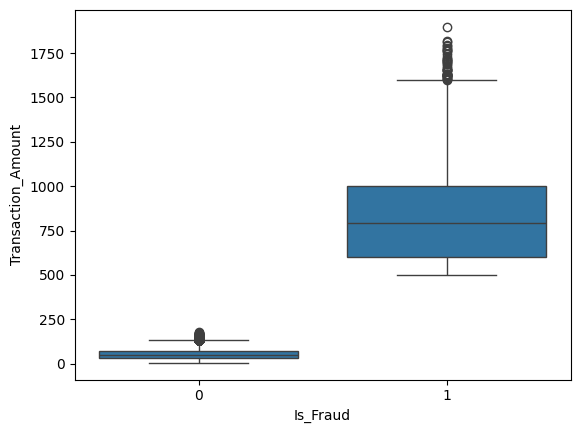

In [381]:
sns.boxplot(x='Is_Fraud', y='Transaction_Amount', data=train_set)


In [383]:
correlation_matrix.loc[["Transaction_Amount", "Transaction_Type_Online", "Account_Type_Checking"],
                       ["Is_Fraud", "Transaction_Type_POS", "Account_Type_Savings"]]


,Is_Fraud,Transaction_Type_POS,Account_Type_Savings
Transaction_Amount,0.936302,-0.000714,-0.002207
Transaction_Type_Online,0.001137,-0.667944,0.001468
Account_Type_Checking,0.000850,-0.002653,-0.801070


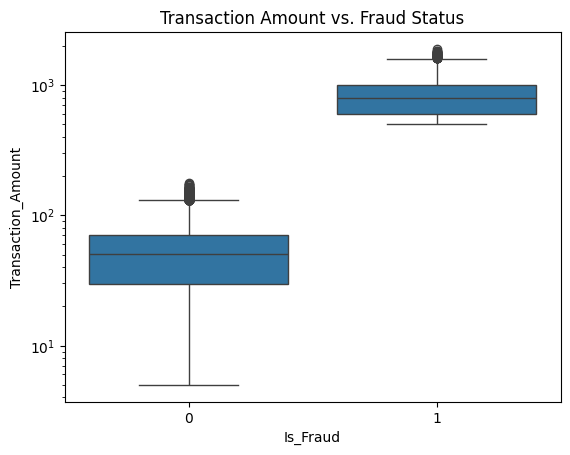

In [385]:


sns.boxplot(x="Is_Fraud", y="Transaction_Amount", data=train_set)
plt.yscale("log")  # Log scale to see outliers better
plt.title("Transaction Amount vs. Fraud Status")
plt.show()


In [387]:
print(train_set.groupby("Is_Fraud")["Transaction_Amount"].describe())


             count        mean         std    min         25%         50%  \
Is_Fraud                                                                    
0         148800.0   50.894869   28.173358    5.0   29.761953   50.110801   
1          11200.0  822.803931  259.658877  500.0  598.459334  795.079908   

                 75%          max  
Is_Fraud                           
0          70.242580   175.825322  
1         998.685954  1897.869419  


In [389]:
train_set["Transaction_Amount"] = np.log1p(train_set["Transaction_Amount"])
test_set["Transaction_Amount"] = np.log1p(test_set["Transaction_Amount"])


Transaction_Type_Online vs Transaction_Type_POS

In [392]:
train_set[["Transaction_Type_Online", "Transaction_Type_POS"]].sum()


Transaction_Type_Online    64018
Transaction_Type_POS       64129
dtype: int64

In [394]:
print(train_set.groupby(["Transaction_Type_Online", "Transaction_Type_POS"]).size())


Transaction_Type_Online  Transaction_Type_POS
False                    False                   31853
                         True                    64129
True                     False                   64018
dtype: int64


In [396]:
train_set.drop(columns=["Transaction_Type_POS"], inplace=True)
test_set.drop(columns=["Transaction_Type_POS"], inplace=True)


Account_Type_Checking vs Account_Type_Savings


In [399]:
print(train_set.groupby(["Account_Type_Checking", "Account_Type_Savings"]).size())


Account_Type_Checking  Account_Type_Savings
False                  False                   16089
                       True                    95767
True                   False                   48144
dtype: int64


In [401]:
train_set.drop(columns=["Account_Type_Savings"], inplace=True)
test_set.drop(columns=["Account_Type_Savings"], inplace=True)


In [403]:
for col in train_set.columns:
    print(col)


Age
State
City
Transaction_Amount
Merchant_Category
Account_Balance
Transaction_Location
Device_Type
Is_Fraud
Transaction_Description
Transaction_Month
Transaction_Day
Transaction_Weekday
Gender_Male
Bank_Branch_Branch B
Bank_Branch_Branch C
Bank_Branch_Branch D
Account_Type_Checking
Transaction_Type_Online
Transaction_Device_Mobile
Transaction_Device_POS Terminal
Transaction_Device_Web
Transaction_Currency_EUR
Transaction_Currency_GBP
Transaction_Currency_USD
Time_Category_Evening
Time_Category_Morning
Time_Category_Night


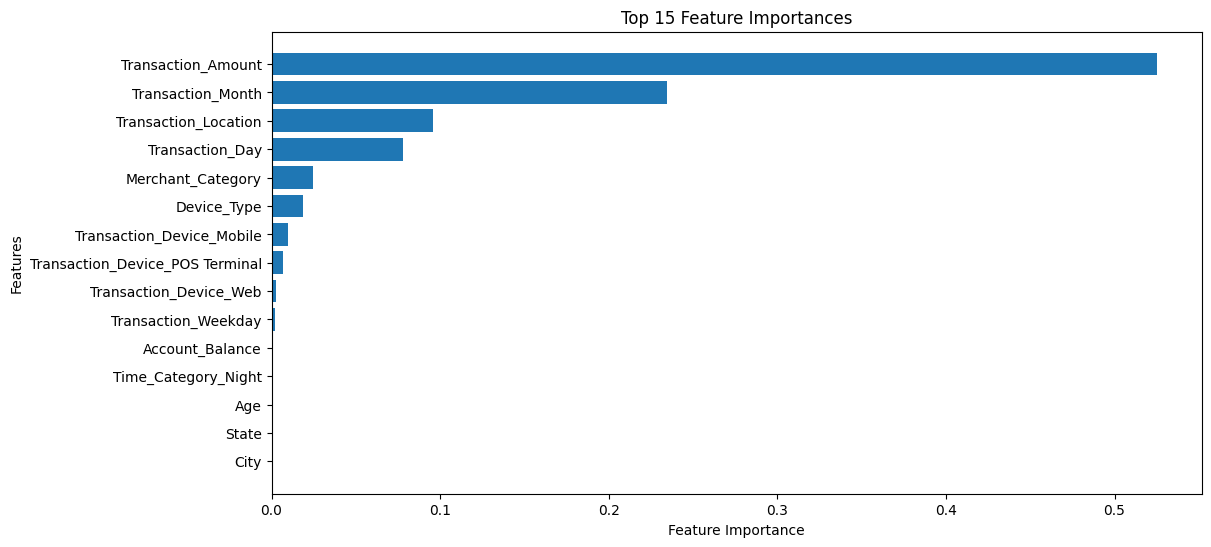

In [405]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
#import matplotlib.pyplot as plt

X_train = train_set.drop(columns=['Is_Fraud'])
y_train = train_set['Is_Fraud']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)


feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(12, 6))
plt.barh(feature_importances['Feature'][:15], feature_importances['Importance'][:15])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Top 15 Feature Importances")
plt.gca().invert_yaxis()
plt.show()


In [406]:
low_importance_features = feature_importances[feature_importances['Importance'] < 0.01]
print("Low-importance features:\n", low_importance_features)


Low-importance features:
                             Feature  Importance
18        Transaction_Device_Mobile    0.009720
19  Transaction_Device_POS Terminal    0.006985
20           Transaction_Device_Web    0.002723
11              Transaction_Weekday    0.002138
5                   Account_Balance    0.000134
26              Time_Category_Night    0.000129
0                               Age    0.000104
1                             State    0.000051
2                              City    0.000046
8           Transaction_Description    0.000041
17          Transaction_Type_Online    0.000024
15             Bank_Branch_Branch D    0.000023
14             Bank_Branch_Branch C    0.000022
23         Transaction_Currency_USD    0.000020
16            Account_Type_Checking    0.000017
12                      Gender_Male    0.000017
25            Time_Category_Morning    0.000016
21         Transaction_Currency_EUR    0.000014
22         Transaction_Currency_GBP    0.000012
13            

In [409]:
# Identify low-importance features
low_importance_threshold = 0.0005
drop_columns = feature_importances[feature_importances['Importance'] < low_importance_threshold]['Feature'].tolist()

print("Dropping columns:", drop_columns)

# Ensure only existing columns are dropped in X_train
drop_columns = [col for col in drop_columns if col in X_train.columns]

# Drop from X_train ONLY
X_train = X_train.drop(columns=drop_columns)



Dropping columns: ['Account_Balance', 'Time_Category_Night', 'Age', 'State', 'City', 'Transaction_Description', 'Transaction_Type_Online', 'Bank_Branch_Branch D', 'Bank_Branch_Branch C', 'Transaction_Currency_USD', 'Account_Type_Checking', 'Gender_Male', 'Time_Category_Morning', 'Transaction_Currency_EUR', 'Transaction_Currency_GBP', 'Bank_Branch_Branch B', 'Time_Category_Evening']


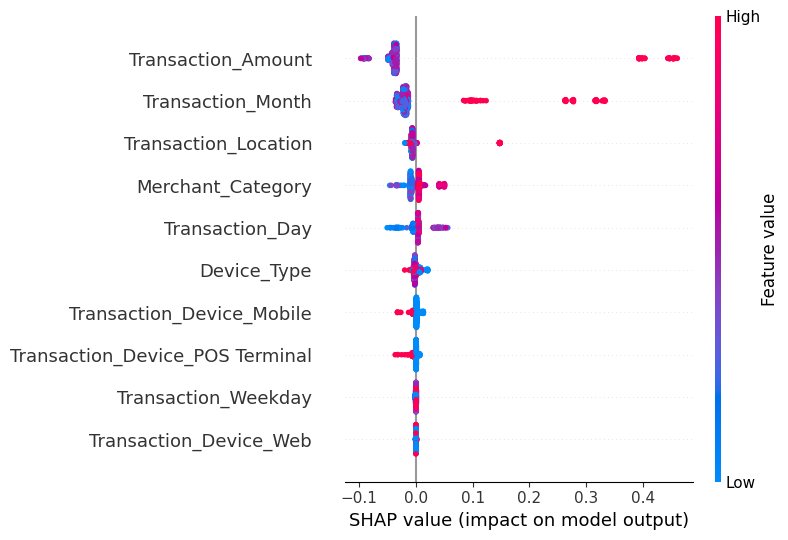

In [283]:
import shap
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Select top 10 most important features based on Random Forest importance
top_features = feature_importances['Feature'][:10].tolist()  
X_train_selected = X_train[top_features]  

# Train a simpler Random Forest model
rf = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)
rf.fit(X_train_selected, y_train) 

# Take a small sample for SHAP analysis
sample_size = 500  # Adjustable based on performance
X_sample = X_train_selected.sample(sample_size, random_state=42)

# Compute SHAP values
explainer = shap.TreeExplainer(rf) 
shap_values = explainer.shap_values(X_sample)

# Plot SHAP summary for class 1 (fraud)
shap.summary_plot(shap_values[:, :, 1], X_sample)


In [152]:
explainer = shap.KernelExplainer(rf.predict_proba, X_sample)
shap_values = explainer.shap_values(X_sample)


Using 500 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 500/500 [13:10<00:00,  1.58s/it]


In [162]:

print("SHAP values shape:", np.array(shap_values).shape)
shap_values[:5]

SHAP values shape: (500, 10, 2)


array([[[ 3.39735318e-02, -3.39735318e-02],
        [ 1.51315045e-02, -1.51315045e-02],
        [ 6.79995394e-03, -6.79995394e-03],
        [ 5.21031524e-03, -5.21031524e-03],
        [ 8.01713606e-03, -8.01713606e-03],
        [ 2.01817885e-03, -2.01817885e-03],
        [-6.79380304e-04,  6.79380304e-04],
        [-3.29257375e-04,  3.29257375e-04],
        [ 6.15359741e-05, -6.15359741e-05],
        [-9.57686057e-05,  9.57686057e-05]],

       [[ 3.47244817e-02, -3.47244817e-02],
        [ 1.65679461e-02, -1.65679461e-02],
        [ 6.94896907e-03, -6.94896907e-03],
        [-3.17029085e-03,  3.17029085e-03],
        [ 8.08124355e-03, -8.08124355e-03],
        [ 1.96145240e-03, -1.96145240e-03],
        [ 5.41255962e-03, -5.41255962e-03],
        [-3.06562416e-04,  3.06562416e-04],
        [-1.53634013e-05,  1.53634013e-05],
        [-9.66856987e-05,  9.66856987e-05]],

       [[ 4.07992553e-02, -4.07992553e-02],
        [ 2.14369881e-02, -2.14369881e-02],
        [ 7.23277427e-03, -7

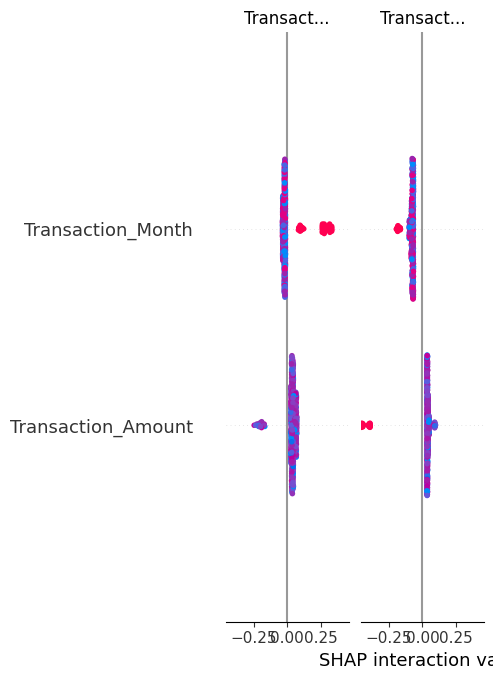

In [164]:
shap.summary_plot(shap_values, X_sample)


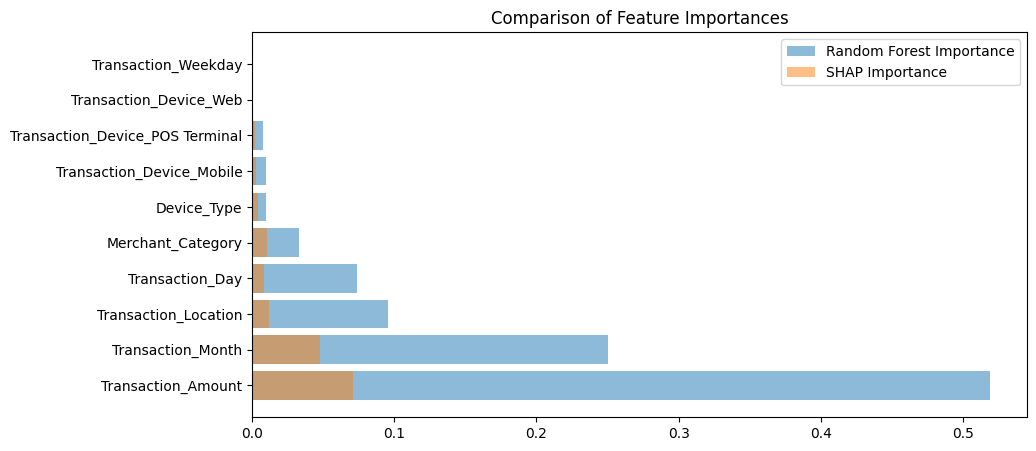

In [166]:
import matplotlib.pyplot as plt
import numpy as np

rf_importances = rf.feature_importances_

shap_importance = np.abs(shap_values).mean(axis=(0,2))

feature_names = X_sample.columns
plt.figure(figsize=(10,5))
plt.barh(feature_names, rf_importances, alpha=0.5, label="Random Forest Importance")
plt.barh(feature_names, shap_importance, alpha=0.5, label="SHAP Importance")
plt.legend()
plt.title("Comparison of Feature Importances")
plt.show()


In [411]:
X_train = X_train.drop(columns=["Transaction_Weekday", "Transaction_Device_Web"])


New_dataset

In [414]:

X_test = test_set.drop(columns=['Is_Fraud'])  
X_test = X_test[X_train.columns]


In [416]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [418]:
print("Original columns in train_set:", train_set.columns)
print("Columns after dropping in X_train:", X_train.columns)


Original columns in train_set: Index(['Age', 'State', 'City', 'Transaction_Amount', 'Merchant_Category',
       'Account_Balance', 'Transaction_Location', 'Device_Type', 'Is_Fraud',
       'Transaction_Description', 'Transaction_Month', 'Transaction_Day',
       'Transaction_Weekday', 'Gender_Male', 'Bank_Branch_Branch B',
       'Bank_Branch_Branch C', 'Bank_Branch_Branch D', 'Account_Type_Checking',
       'Transaction_Type_Online', 'Transaction_Device_Mobile',
       'Transaction_Device_POS Terminal', 'Transaction_Device_Web',
       'Transaction_Currency_EUR', 'Transaction_Currency_GBP',
       'Transaction_Currency_USD', 'Time_Category_Evening',
       'Time_Category_Morning', 'Time_Category_Night'],
      dtype='object')
Columns after dropping in X_train: Index(['Transaction_Amount', 'Merchant_Category', 'Transaction_Location',
       'Device_Type', 'Transaction_Month', 'Transaction_Day',
       'Transaction_Device_Mobile', 'Transaction_Device_POS Terminal'],
      dtype='object'

In [420]:
print("Remaining columns in X_train:", X_train.columns)
print("Remaining columns in X_test:", X_test.columns)


Remaining columns in X_train: Index(['Transaction_Amount', 'Merchant_Category', 'Transaction_Location',
       'Device_Type', 'Transaction_Month', 'Transaction_Day',
       'Transaction_Device_Mobile', 'Transaction_Device_POS Terminal'],
      dtype='object')
Remaining columns in X_test: Index(['Transaction_Amount', 'Merchant_Category', 'Transaction_Location',
       'Device_Type', 'Transaction_Month', 'Transaction_Day',
       'Transaction_Device_Mobile', 'Transaction_Device_POS Terminal'],
      dtype='object')


In [422]:
print(train_set.select_dtypes(include=['object']).columns)
print(test_set.select_dtypes(include=['object']).columns)


Index([], dtype='object')
Index([], dtype='object')


In [424]:

y_test = test_set['Is_Fraud']


train_set = pd.concat([X_train, y_train], axis=1)
test_set = pd.concat([X_test, y_test], axis=1)



In [426]:
train_set.to_csv("processed_train_set.csv", index=False)
test_set.to_csv("processed_test_set.csv", index=False)

